In [166]:
import pandas as pd
import zipfile
import numpy as np

In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
#forma de abrir do renan
#zf1 = zipfile.ZipFile('/content/drive/MyDrive/House_Sale/House_Sale.zip')  #aloca o arquivo zip


#data = pd.read_csv(zf1.open('kc_house_data.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP

#forma de abrir do enzo
zf2 = zipfile.ZipFile('/content/drive/MyDrive/Quinto Semestre/IA/Atividade_2/House_Sale/House_Sale.zip')  #aloca o arquivo zip

data = pd.read_csv(zf2.open('kc_house_data.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP

In [169]:
data_total = data
data = data.drop(['id', 'date'], axis = 1) # id e data são dados irrelevantes para o preço. Logo, retirar essas 2 colunas
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [170]:
data.isnull().sum() # iremos ver se tem algum campo com valores NaN

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [171]:
# Como existem campos com NaN, iremos descobrir quais são as posições, e iremos 
# remover essas linhas

np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [172]:
# Dados faltantes nas posições 4670 e 7357, então iremos remover essas linhas
data = data.drop([10, 17])

In [173]:
data = data.sample(frac = 1) # aqui iremos embaralhar os dados

In [174]:
posicao_latitude = data['lat'].values # iremos salvar os dados da latitude 
print(posicao_latitude)
posicao_longitude = data['long'].values # iremos salvar os dados da longitude
print(posicao_longitude)

# esses dados serão importantes para depois vincularmos às respectivacs posições no mapa

[47.7518 47.5629 47.6264 ... 47.3732 47.6491 47.5554]
[-122.279 -122.297 -122.092 ... -122.023 -122.061 -122.382]


In [175]:
# como já salvamos os valores da latitude e longiute, iremos apagar essas 2 colunas, pois não são relevantes para o nosso preço
data = data.drop(['lat', 'long'], axis = 1) 

In [176]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

<Axes: >

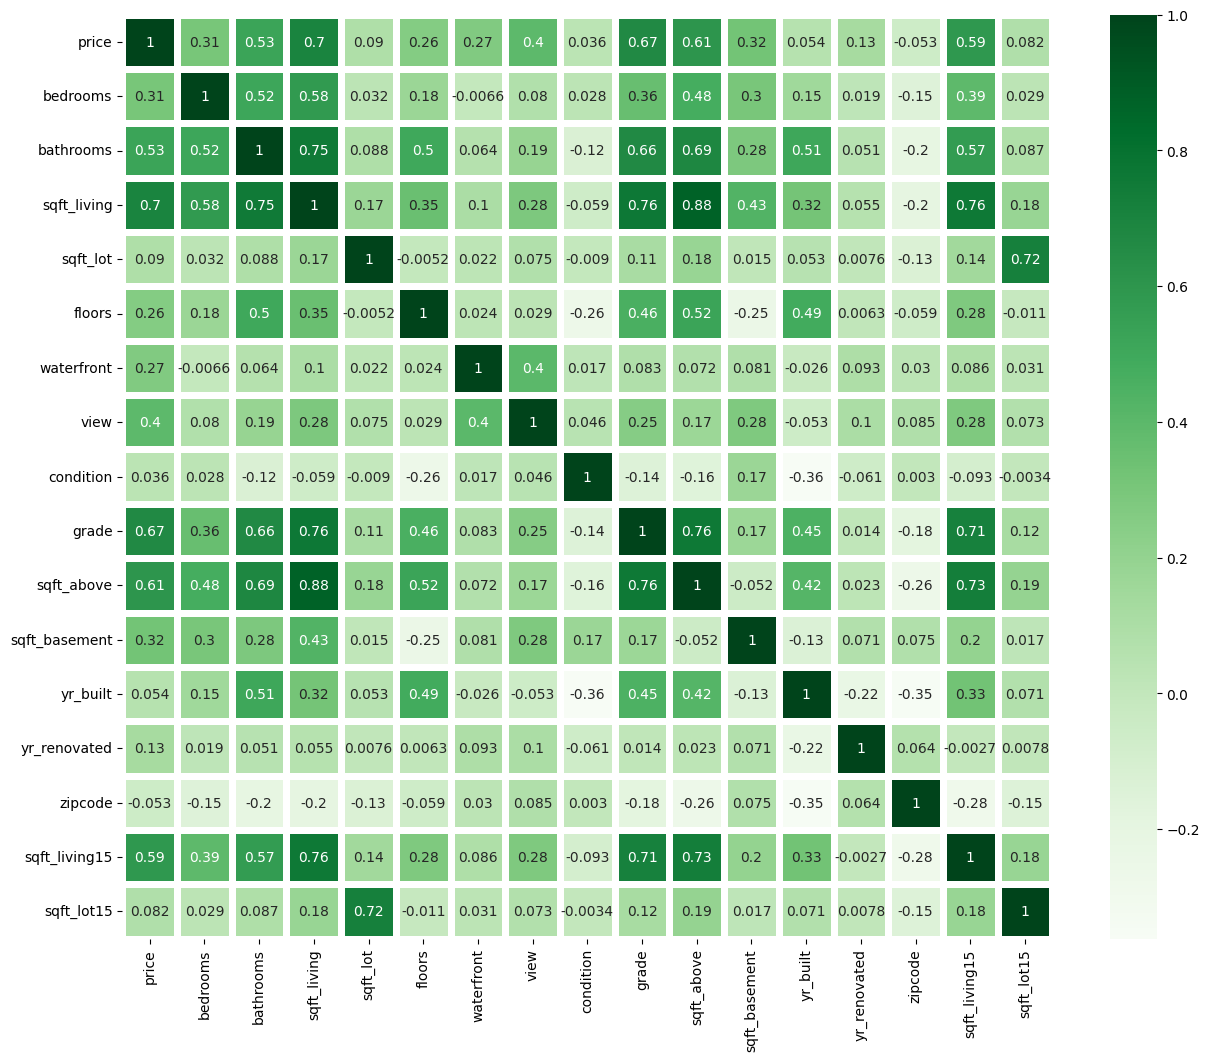

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()
corr

f, ax = plt.subplots(figsize = (15,12))
sns.heatmap(corr, cmap = sns.color_palette("Greens", as_cmap=True), linewidths = 5, annot = True) 

# aqui estamos analisando a correlação. O objetivo da análise dessa correlação é analisar
# a correlação entre as amostras. Para nosso algoritmo, não é importante correlações próxs
# a 1, ou ou a -1. 


In [178]:
# ao analisar as correlações percebe-se que o zipcode não é relevante
# para nosso algoritmo, pois toda sua linha está beirando o 0, então
# retira-lo

data = data.drop(['zipcode'], axis = 1) 

In [179]:
from sklearn.model_selection import train_test_split # separa os dados em treinamento e teste de forma aleatória

y = data['price']
X = data.iloc[:, 1:16]
print(y.shape)
print(X.shape)

# Iremos ter 80% para treinamento e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 

(21611,)
(21611, 15)


In [180]:
# Aqui estamos utilizando o método linear para fazer a predição

from sklearn import datasets, linear_model
from sklearn import metrics

regr = linear_model.LinearRegression() # Aqui estamos criando o modelo de regressão linear
regr.fit(X_train, y_train) # Aqui estamos treinando o modelo
regr_predicao = regr.predict(X_test) # Aqui estmaos fazendo uma predição

# Calcula as métricas MAE, MSE e RMSE entre as predições do modelo e os valores verdadeiros
MAE_regr = metrics.mean_absolute_error(y_test, regr_predicao) 
MSE_regr = metrics.mean_squared_error(y_test, regr_predicao) 
RMSE_regr = np.sqrt(metrics.mean_squared_error(y_test, regr_predicao)) 

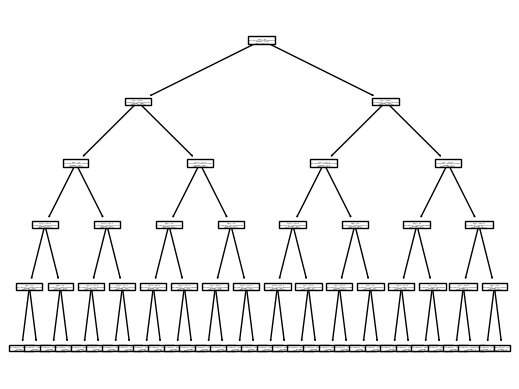

In [181]:
# Aqui estamos utilizando o método de árvore para fazer a predição

from sklearn import tree


clf = tree.DecisionTreeRegressor(random_state=0, max_depth=5) # Instancia um objeto da classe DecisionTreeRegressor, com um valor fixo para random_state e um limite de profundidade de 5 camadas

clf = clf.fit(X_train, y_train) # Treina o modelo DecisionTreeRegressor nos dados de treinamento

dt_predicao_arvore = clf.predict(X_test) # Realiza a predição do modelo DecisionTreeRegressor nos dados de teste

# Calcula as métricas MAE, MSE e RMSE entre as predições do modelo e os valores verdadeiros
MAE_tree = metrics.mean_absolute_error(y_test, dt_predicao_arvore)
MSE_tree = metrics.mean_squared_error(y_test, dt_predicao_arvore)
RMSE_tree = np.sqrt(metrics.mean_squared_error(y_test, dt_predicao_arvore))

# Plota a árvore de decisão construída
tree.plot_tree(clf)
plt.show()


In [182]:
# Importar as bibliotecas necessárias
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, f_regression

# Separar a variável alvo e as features
y = data['price'] # vamos salvar o preço 
X = data.iloc[:, 1:16] # aqui iremos salvar todos os dados das colunas 1 - 16

# Selecionar as melhores variáveis usando o teste F
selector = SelectKBest(score_func = f_regression, k=8)

# Aplicar a seleção de atributos aos dados de entrada X e às saídas y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
X_selected = selector.fit_transform(X_scaled, y)

# Dividir o conjunto de dados em 5 partes para validação cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.get_n_splits(X)


5

In [183]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Definindo as camadas da rede neural
        self.fc1 = nn.Linear(15, 50) # camada totalmente conectada com 15 entradas e 50 saídas
        self.bn1 = nn.BatchNorm1d(50) # normalização em lote para regularizar a rede
        self.fc2 = nn.Linear(50, 25) # camada totalmente conectada com 50 entradas e 25 saídas
        self.bn2 = nn.BatchNorm1d(25) # normalização em lote para regularizar a rede
        self.fc3 = nn.Linear(25, 15) # camada totalmente conectada com 25 entradas e 15 saídas
        self.bn3 = nn.BatchNorm1d(15) # normalização em lote para regularizar a rede
        self.fc4 = nn.Linear(15, 10) # camada totalmente conectada com 15 entradas e 10 saídas
        self.bn4 = nn.BatchNorm1d(10) # normalização em lote para regularizar a rede
        self.fc5 = nn.Linear(10, 1) # camada totalmente conectada com 10 entradas e 1 saída

    def forward(self, x):
        # Propagação para frente na rede neural
        x = nn.functional.relu(self.bn1(self.fc1(x))) # camada 1
        x = nn.functional.relu(self.bn2(self.fc2(x))) # camada 2
        x = nn.functional.relu(self.bn3(self.fc3(x))) # camada 3
        x = nn.functional.relu(self.bn4(self.fc4(x))) # camada 4
        x = self.fc5(x) # camada de saída
        return x

In [184]:
# Defina a função para treinar a RNA
def train(model, X_train, y_train, X_val, y_val, num_epoch=1000, optimizer_type="Newton", weight_decay=0.001, patience=30):
    criterion = nn.MSELoss() # Define a função de perda como o erro quadrático médio

    # Define o otimizador com base no tipo de otimizador passado como parâmetro
    if optimizer_type == "Newton":
        optimizer = optim.Rprop(model.parameters(), lr=0.1)
    else:
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    best_val_loss = float('inf') # Define a melhor perda na validação inicialmente como infinito
    best_model = None # Define o melhor modelo como vazio
    patience_counter = 0 # Inicializa o contador de paciência como zero
    train_losses = [] # Inicializa uma lista vazia para armazenar as perdas de treinamento
    val_losses = [] # Inicializa uma lista vazia para armazenar as perdas de validação

    # Loop de treinamento
    for epoch in range(num_epoch):
        optimizer.zero_grad() # Zera os gradientes do otimizador
        outputs = model(X_train) # Realiza a predição do modelo nos dados de treinamento
        loss = criterion(outputs, y_train) # Calcula a perda com base na função de perda e nas predições e rótulos de treinamento
        l2_reg = torch.tensor(0.) # Inicializa a regularização L2 como zero
        for param in model.parameters(): # Loop pelos parâmetros do modelo
            l2_reg += torch.norm(param) # Adiciona a norma L2 dos parâmetros à regularização L2
        loss += weight_decay * l2_reg # Adiciona a regularização L2 à perda
        loss.backward() # Realiza a propagação de volta do gradiente para calcular os gradientes dos parâmetros
        optimizer.step() # Realiza uma etapa de otimização para atualizar os parâmetros com base nos gradientes

        train_losses.append(loss.item()) # Adiciona a perda de treinamento à lista de perdas de treinamento

        with torch.no_grad():
            val_outputs = model(X_val) # Realiza a predição do modelo nos dados de validação
            val_loss = criterion(val_outputs, y_val) # Calcula a perda com base na função de perda e nas predições e rótulos de validação
            val_losses.append(val_loss.item()) # Adiciona a perda de validação à lista de perdas de validação

        if val_loss < best_val_loss: # Verifica se a perda de validação atual é menor que a melhor perda de validação até agora
            best_val_loss = val_loss # Atualiza a melhor perda de validação
            best_model = model.state_dict() # Salva os parâmetros do modelo correspondentes à melhor perda de validação
            patience_counter = 0 # Reseta o contador de paciência
        else:
            patience_counter += 1 # Incrementa o contador de paciência
            if patience_counter >= patience: # Verifica se o contador de paciência excedeu o limite de paciência
                print("Early stopping after epoch", epoch) # Imprime a mensagem de interrupção antecipada
                model.load_state_dict(best_model) # Carrega o modelo
                break
    
    return model, train_losses, val_losses

In [185]:
import torch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_percentage_error

num_epochs = 1000
models = []
results = []


# Itera sobre os folds gerados pelo K-Fold
for i, (train_index, test_index) in enumerate(kf.split(X_scaled)):
    
    # Define os conjuntos de treinamento e teste para esta iteração
    X_train = torch.from_numpy(X_scaled[train_index]).float()
    y_train = torch.from_numpy(y.values[train_index]).float().unsqueeze(1)
    X_test = torch.from_numpy(X_scaled[test_index]).float()
    y_test = torch.from_numpy(y.values[test_index]).float().unsqueeze(1)

    # Cria uma nova instância do modelo de rede neural
    model = Net()

    # Treina o modelo com os dados de treinamento
    model, train_loss, val_loss = train(model, X_train, y_train, X_test, y_test, num_epoch=num_epochs, weight_decay=0.001)

    # Realiza a predição dos dados de teste
    y_pred = model(X_test)

    # Calcula o erro absoluto percentual médio (MAPE)
    mape = mean_absolute_percentage_error(y_test, y_pred.detach().numpy())

    # Armazena os resultados desta iteração
    result = {
        'model': model,
        'mape': mape,
        'train_losses': train_loss,
        'val_losses': val_loss
    }
    results.append(result)

# Ordena os modelos de acordo com seus valores MAPE (de tras para frente)
models_sorted = sorted(results, key=lambda x: x['mape'], reverse = False)

# Seleciona os 5 melhores modelos
top_models = [r['model'] for r in models_sorted[:5]]


Early stopping after epoch 91
Early stopping after epoch 106
Early stopping after epoch 83
Early stopping after epoch 97
Early stopping after epoch 88


In [186]:
# Aqui iremos salvar as 5 melhores redes no modelo em que foi pedido

for i, model in enumerate(top_models):
    filename = f'Enzo_Reis_e_Renan_Leite_RNA_FOLD_{i+1}.pth'
    torch.save(model.state_dict(), filename)
    print(f'Modelo {i+1}: {filename}, MAPE: {models_sorted[i]["mape"]}')

Modelo 1: Enzo_Reis_e_Renan_Leite_RNA_FOLD_1.pth, MAPE: 0.24458736181259155
Modelo 2: Enzo_Reis_e_Renan_Leite_RNA_FOLD_2.pth, MAPE: 0.2464994192123413
Modelo 3: Enzo_Reis_e_Renan_Leite_RNA_FOLD_3.pth, MAPE: 0.24783654510974884
Modelo 4: Enzo_Reis_e_Renan_Leite_RNA_FOLD_4.pth, MAPE: 0.2485460340976715
Modelo 5: Enzo_Reis_e_Renan_Leite_RNA_FOLD_5.pth, MAPE: 0.24881385266780853


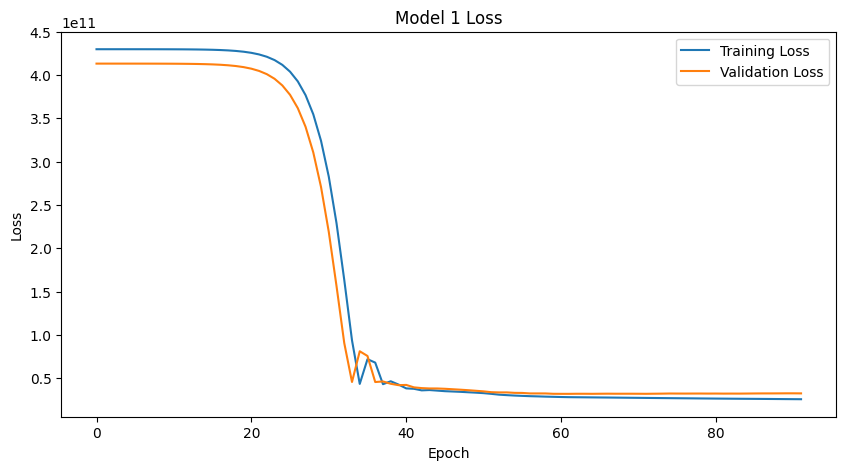

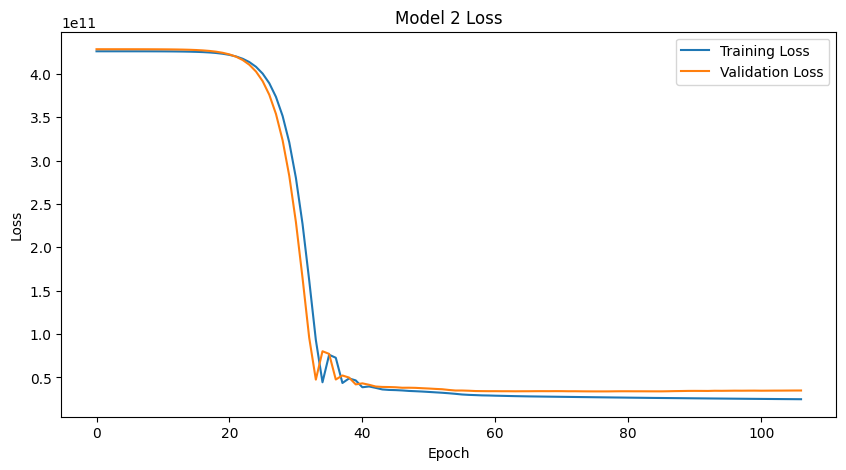

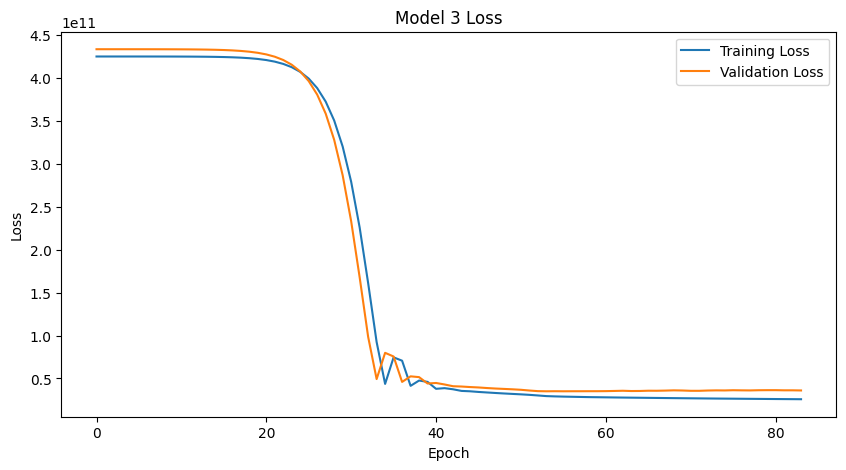

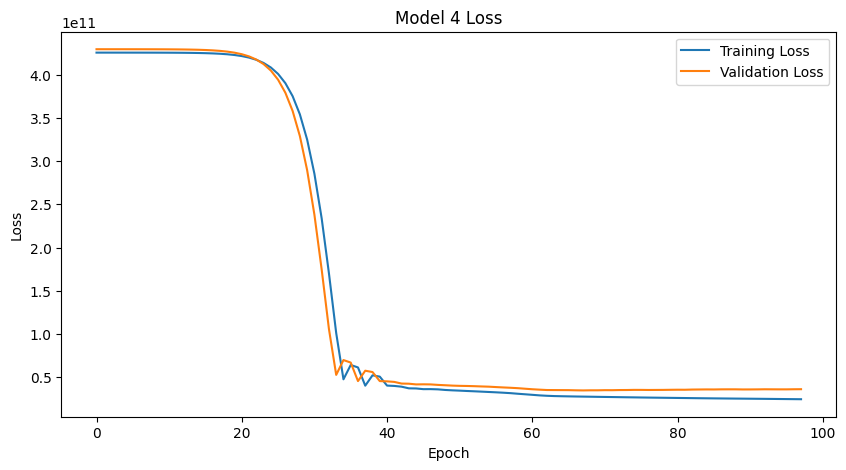

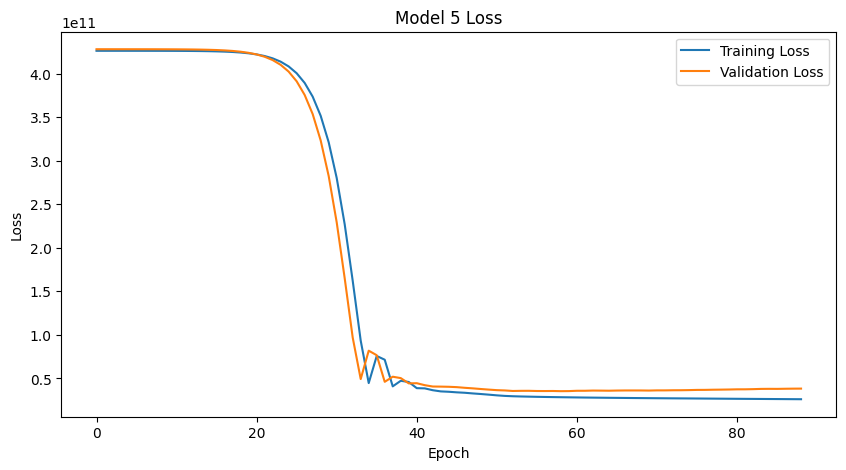

In [187]:
# Aqui estamos plotando 5 gráficos, que mostra como a Loss se comporta através das épocas

import matplotlib.pyplot as plt

for i, model in enumerate(top_models):
    plt.figure(figsize=(10, 5))
    plt.plot(results[i]['train_losses'], label='Training Loss')
    plt.plot(results[i]['val_losses'], label='Validation Loss')
    plt.title('Model ' + str(i+1) + ' Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


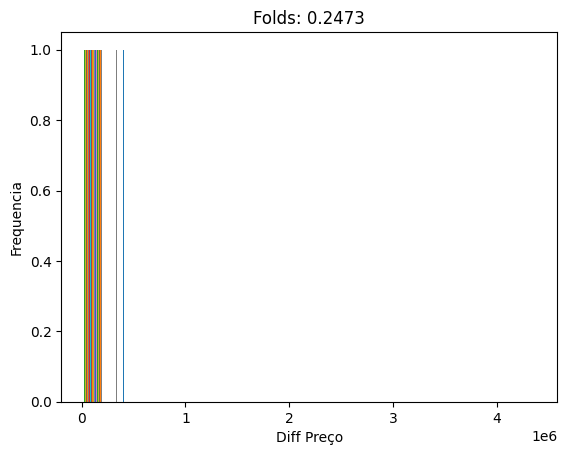

In [188]:
# Aqui está sendo mostrado um histograma da diff pedida também 

import matplotlib.pyplot as plt

diff_all = []
mape_all = []
for i in range(len(top_models)):
    model = top_models[i]
    y_pred = model(X_test)
    diff = np.absolute(y_test - y_pred.detach().numpy())
    diff_all.extend(diff)
    mape_all.append(models_sorted[i]['mape'])

plt.hist(diff_all, bins=20)
plt.title(f"Folds: {np.mean(mape_all):.4f}")
plt.xlabel('Diff Preço')
plt.ylabel('Frequencia')
plt.show()


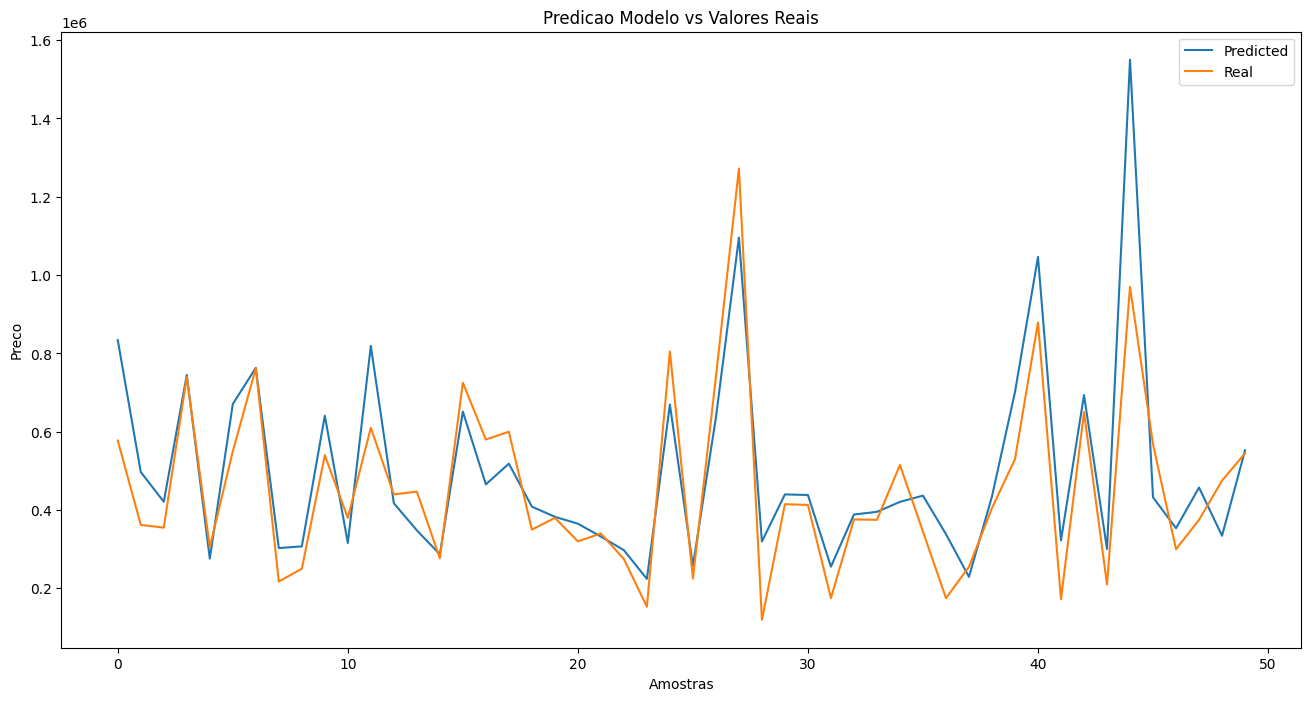

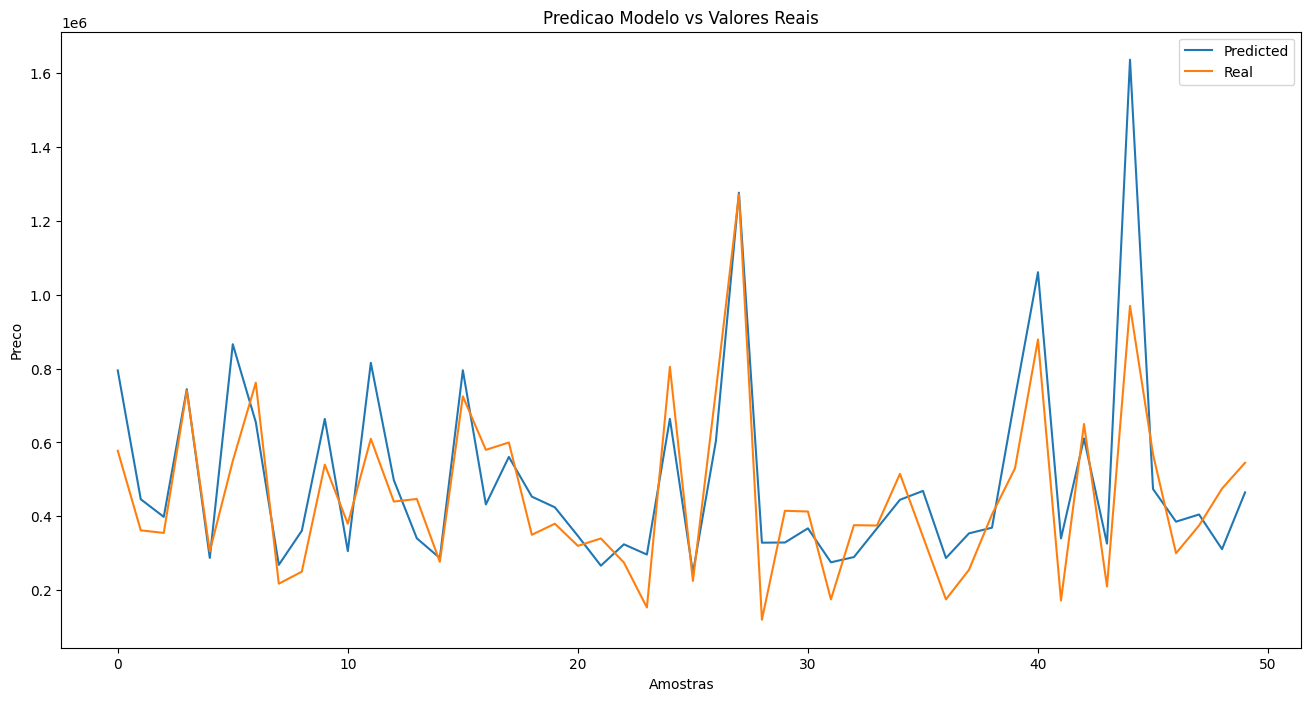

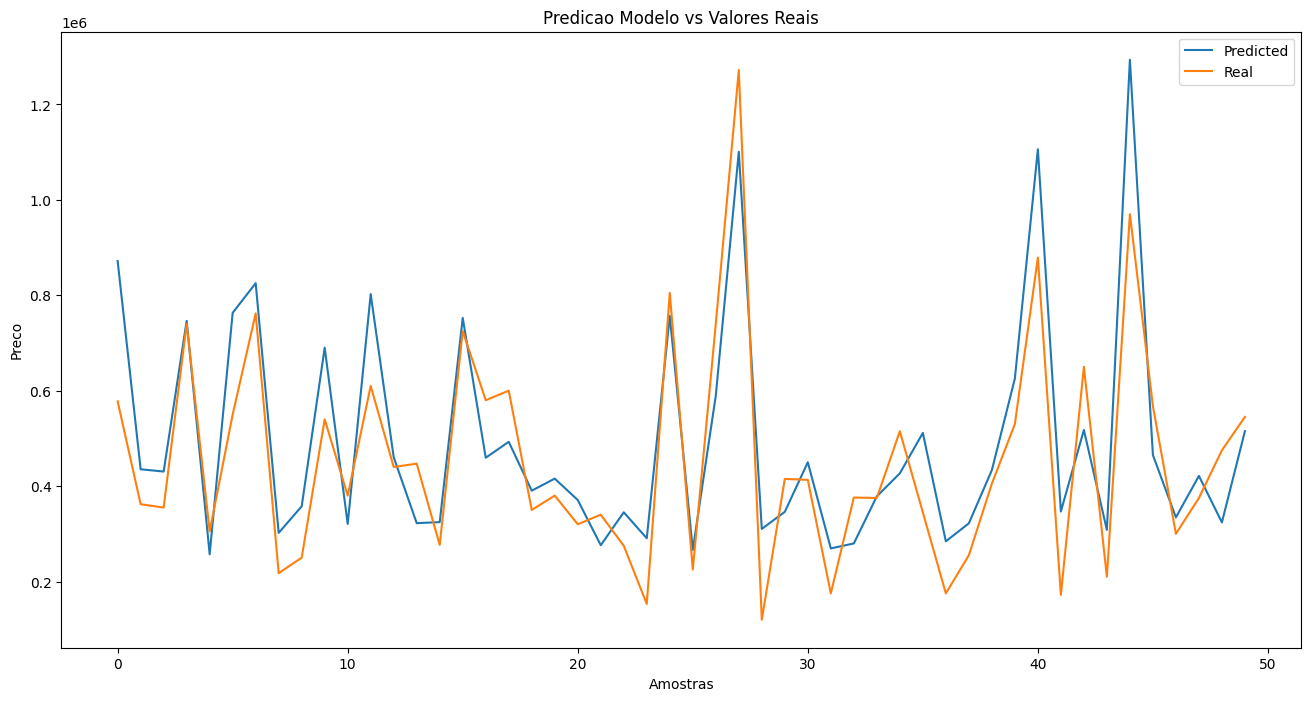

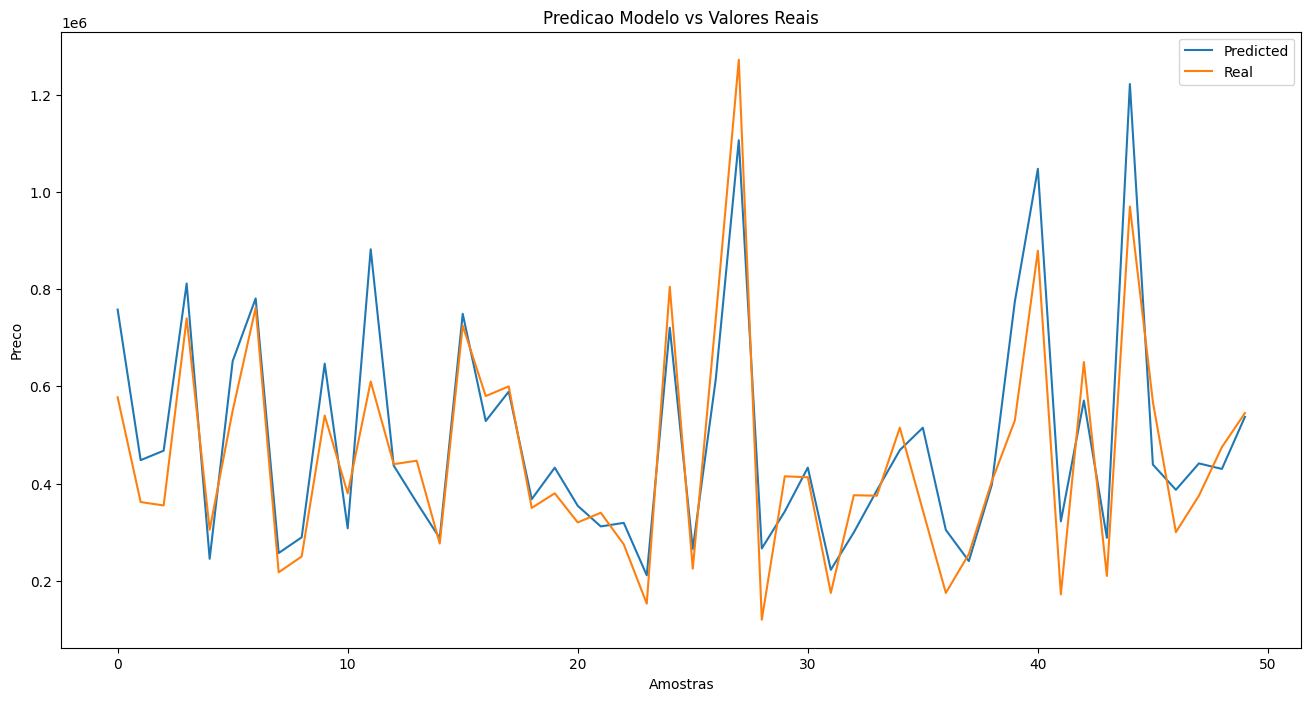

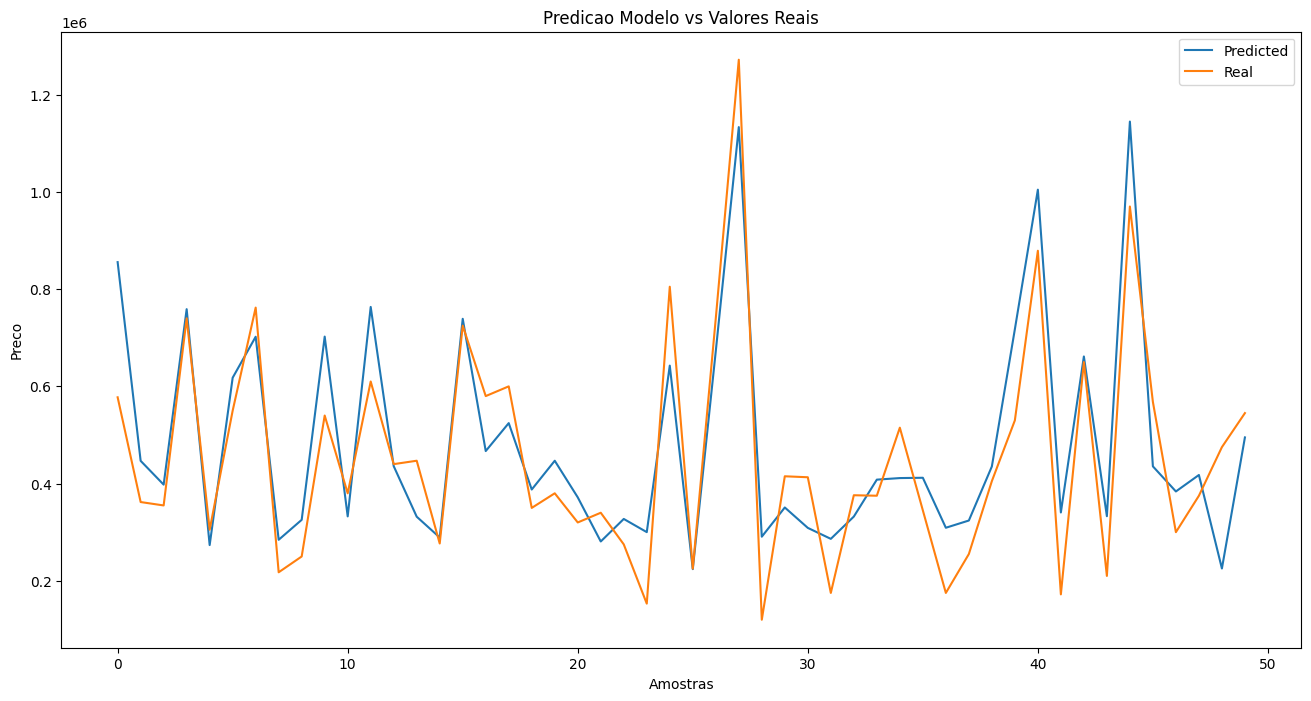

In [189]:
# Aqui está sendo plotado o comportamento do preço predito pelo algoritmo e o preço real, pelos 5 folds

import matplotlib.pyplot as plt

for model in top_models:
    y_pred = model(X_test)
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(y_pred.detach().numpy()[:50], label = 'Predicted')
    ax.plot(y_test.detach().numpy()[:50], label = 'Real')
    ax.set_xlabel('Amostras')
    ax.set_ylabel('Preco')
    ax.set_title('Predicao Modelo vs Valores Reais')
    plt.legend()
    plt.show()




In [190]:
# Aqui iremos plotar a comparação entre os 3 modelos gerados 
# Regressão Linear, Árvore e Redes Neurais

y_pred = model(X_test)
MAE_RNA = metrics.mean_absolute_error(y_test, y_pred.detach().numpy())
MSE_RNA = metrics.mean_squared_error(y_test, y_pred.detach().numpy())
RMSE_RNA = np.sqrt(metrics.mean_squared_error(y_test, y_pred.detach().numpy()))

import pandas as pd

# Coloque os valores de modelo e as métricas em um dicionário
model_dict = {'Modelo': ['Regressão Linear', 'Árvore de Decisão', 'Redes Neurais'],
              'MAE': [MAE_regr, MAE_tree, MAE_RNA],
              'MSE': [MSE_regr, MSE_tree, MSE_RNA],
              'RMSE': [RMSE_regr, RMSE_tree, RMSE_RNA]}

# Crie um dataframe a partir do dicionário
df = pd.DataFrame(model_dict)

# Imprima o novo dataframe
print(df)

              Modelo            MAE           MSE           RMSE
0   Regressão Linear  138804.003936  4.302100e+10  207415.046587
1  Árvore de Decisão  141616.155698  4.579650e+10  214001.167703
2      Redes Neurais  110488.148438  2.524523e+10  158887.484375


In [191]:
# Aqui iremos colocar a coluna "NEW PRICE" em nosso data frame

# Selecionar o melhor modelo da lista de modelos ordenados
best_model = models_sorted[0]['model']

# Utilizar o modelo para prever os valores de y para todo o conjunto de dados X
X_tensor = torch.from_numpy(X_scaled).float()
y_pred = best_model(X_tensor)
y_pred = y_pred.detach().numpy()

print(len(data_total))
print(len(y_pred))

data_total = data_total.iloc[:-2]
data_total['NEW PRICE'] = y_pred

21613
21611


<ipython-input-191-2ab0b4f46fcc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_total['NEW PRICE'] = y_pred


In [192]:
data_total.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,NEW PRICE
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,397931.281250
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,349878.406250
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,732896.312500
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,324838.750000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,215750.546875


In [193]:
data_total[["price", "NEW PRICE"]]


,price,NEW PRICE
0,221900.0,397931.281250
1,538000.0,349878.406250
2,180000.0,732896.312500
3,604000.0,324838.750000
4,510000.0,215750.546875
...,...,...
21606,1007500.0,228091.062500
21607,475000.0,664438.312500
21608,360000.0,632601.125000
21609,400000.0,435509.093750


### Para visualização do mapa basta baixar o arquivo e rodar ele depois no navegador

<a href="https://drive.google.com/file/d/1XfChxUh38MVXG5vBblxx2B1lpvoOiko_/view?usp=share_link">CLIQUE AQUI PARA BAIXAR</a>
